In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data_file = 'german.data'
doc_file = 'german.doc'

### Feature Names as per the dataset description

In [78]:
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "EmploymentSince", "InstallmentRate", "PersonalStatusSex",
    "Debtors", "ResidenceSince", "Property", "Age", "InstallmentPlans",
    "Housing", "ExistingCredits", "Job", "LiablePeople", "Telephone",
    "ForeignWorker", "Target"
]

df = pd.read_csv(data_file, sep=' ', header=None, names=columns)


In [79]:
status_map = {
    'A11': '< 0 DM',
    'A12': '0 ≤ < 200 DM',
    'A13': '≥ 200 DM or salary assignment',
    'A14': 'No checking account'
}

credit_history_map = {
    'A30': 'No credits/all paid back',
    'A31': 'All paid back duly (this bank)',
    'A32': 'Credits paid back till now',
    'A33': 'Delay in paying off',
    'A34': 'Critical/other credit existing'
}

purpose_map = {
    'A40': 'Car (new)',
    'A41': 'Car (used)',
    'A42': 'Furniture/equipment',
    'A43': 'Radio/TV',
    'A44': 'Domestic appliances',
    'A45': 'Repairs',
    'A46': 'Education',
    'A47': 'Vacation',
    'A48': 'Retraining',
    'A49': 'Business',
    'A410': 'Others'
}

savings_map = {
    'A61': '< 100 DM',
    'A62': '100 ≤ < 500 DM',
    'A63': '500 ≤ < 1000 DM',
    'A64': '≥ 1000 DM',
    'A65': 'Unknown/no savings'
}

employment_map = {
    'A71': 'Unemployed',
    'A72': '< 1 year',
    'A73': '1 ≤ < 4 years',
    'A74': '4 ≤ < 7 years',
    'A75': '≥ 7 years'
}

personal_status_map = {
    'A91': 'Male-divorced/separated',
    'A92': 'Female-div/sep/married',
    'A93': 'Male-single',
    'A94': 'Male-married/widowed',
    'A95': 'Female-single'
}

debtors_map = {
    'A101': 'None',
    'A102': 'Co-applicant',
    'A103': 'Guarantor'
}

property_map = {
    'A121': 'Real estate',
    'A122': 'Building society/life ins.',
    'A123': 'Car or other',
    'A124': 'No property/unknown'
}

installment_plan_map = {
    'A141': 'Bank',
    'A142': 'Stores',
    'A143': 'None'
}

housing_map = {
    'A151': 'Rent',
    'A152': 'Own',
    'A153': 'For free'
}

job_map = {
    'A171': 'Unskilled-nonresident',
    'A172': 'Unskilled-resident',
    'A173': 'Skilled/official',
    'A174': 'Management/self-employed'
}

telephone_map = {
    'A191': 'None',
    'A192': 'Yes (registered)'
}

foreign_worker_map = {
    'A201': 'Yes',
    'A202': 'No'
}


In [80]:
df['Status'] = df['Status'].map(status_map)
df['CreditHistory'] = df['CreditHistory'].map(credit_history_map)
df['Purpose'] = df['Purpose'].map(purpose_map)
df['Savings'] = df['Savings'].map(savings_map)
df['EmploymentSince'] = df['EmploymentSince'].map(employment_map)
df['PersonalStatusSex'] = df['PersonalStatusSex'].map(personal_status_map)
df['Debtors'] = df['Debtors'].map(debtors_map)
df['Property'] = df['Property'].map(property_map)
df['InstallmentPlans'] = df['InstallmentPlans'].map(installment_plan_map)
df['Housing'] = df['Housing'].map(housing_map)
df['Job'] = df['Job'].map(job_map)
df['Telephone'] = df['Telephone'].map(telephone_map)
df['ForeignWorker'] = df['ForeignWorker'].map(foreign_worker_map)

df['Target'] = df['Target'].map({1: 1, 2: 0})       #1->good, 2->bad


In [81]:
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,Debtors,...,Property,Age,InstallmentPlans,Housing,ExistingCredits,Job,LiablePeople,Telephone,ForeignWorker,Target
0,< 0 DM,6,Critical/other credit existing,Radio/TV,1169,Unknown/no savings,≥ 7 years,4,Male-single,None,...,Real estate,67,None,Own,2,Skilled/official,1,Yes (registered),Yes,1
1,0 ≤ < 200 DM,48,Credits paid back till now,Radio/TV,5951,< 100 DM,1 ≤ < 4 years,2,Female-div/sep/married,None,...,Real estate,22,None,Own,1,Skilled/official,1,None,Yes,0
2,No checking account,12,Critical/other credit existing,Education,2096,< 100 DM,4 ≤ < 7 years,2,Male-single,None,...,Real estate,49,None,Own,1,Unskilled-resident,2,None,Yes,1
3,< 0 DM,42,Credits paid back till now,Furniture/equipment,7882,< 100 DM,4 ≤ < 7 years,2,Male-single,Guarantor,...,Building society/life ins.,45,None,For free,1,Skilled/official,2,None,Yes,1
4,< 0 DM,24,Delay in paying off,Car (new),4870,< 100 DM,1 ≤ < 4 years,3,Male-single,None,...,No property/unknown,53,None,For free,2,Skilled/official,2,None,Yes,0


## Visualization

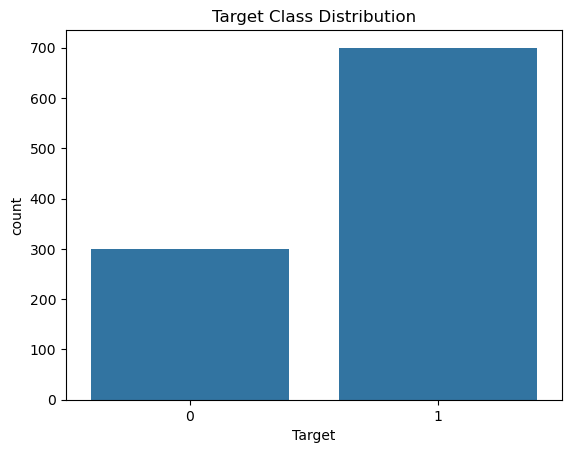

In [82]:
sns.countplot(x='Target', data=df)
plt.title('Target Class Distribution')
plt.show()


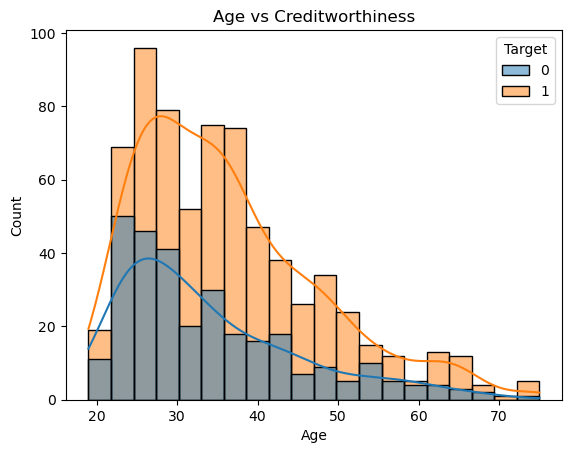

In [83]:
sns.histplot(data=df, x='Age', hue='Target', bins=20, kde=True)
plt.title('Age vs Creditworthiness')
plt.show()


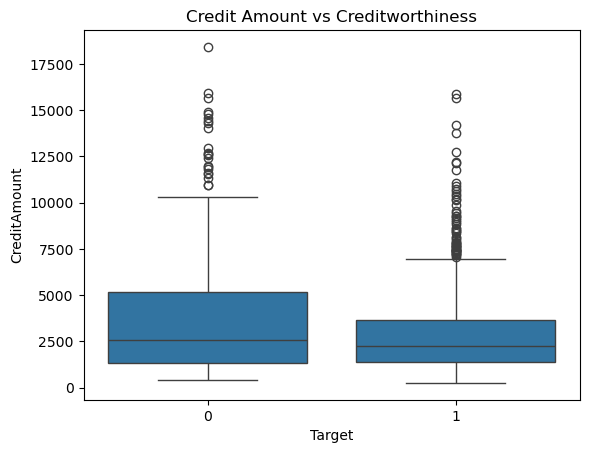

In [84]:
sns.boxplot(x='Target', y='CreditAmount', data=df)
plt.title('Credit Amount vs Creditworthiness')
plt.show()

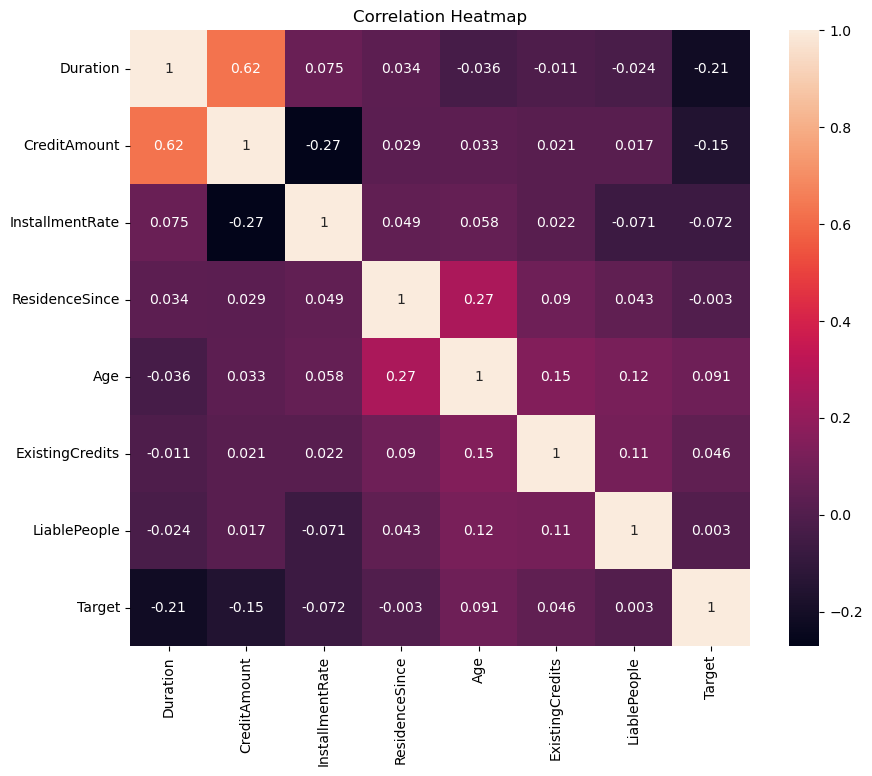

In [85]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [87]:
from sklearn.model_selection import train_test_split
X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
    print(f"{name} → Accuracy: {acc:.4f}, ROC AUC: {roc:.4f}")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression → Accuracy: 0.7250, ROC AUC: 0.5733
Random Forest → Accuracy: 0.7800, ROC AUC: 0.6912
KNN → Accuracy: 0.6700, ROC AUC: 0.5343
SVM → Accuracy: 0.7150, ROC AUC: 0.5219
XGBoost → Accuracy: 0.7950, ROC AUC: 0.7215


C:\Users\Heena\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:45:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Scaling (for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(" RandomForest:", rf_grid.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
 RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [91]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost:", xgb_grid.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [92]:
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [2000]
}

lr_grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression:", lr_grid.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Logistic Regression: {'C': 0.1, 'max_iter': 2000, 'solver': 'lbfgs'}


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

voting_model = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lr', best_lr)
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)
y_prob = voting_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.825
ROC AUC: 0.9052040816326531

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       140
           1       0.85      0.79      0.82       140

    accuracy                           0.82       280
   macro avg       0.83      0.82      0.82       280
weighted avg       0.83      0.82      0.82       280


Confusion Matrix:
 [[121  19]
 [ 30 110]]


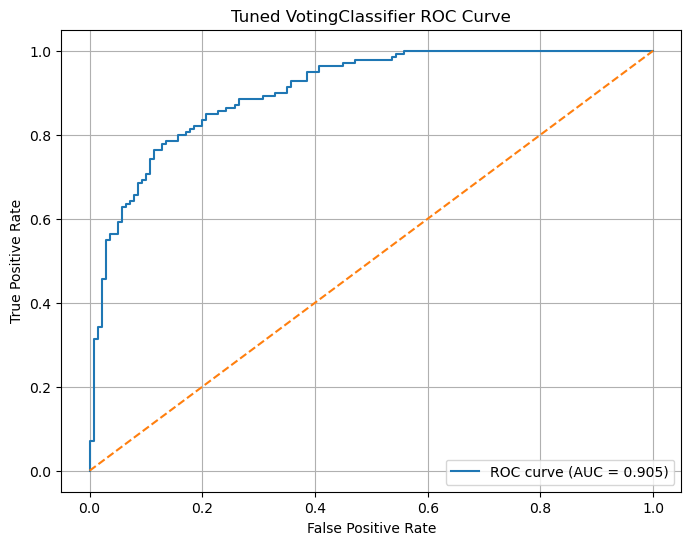

In [94]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned VotingClassifier ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [95]:
import pickle

with open('credit_classifier.pkl', 'wb') as model_file:
    pickle.dump(voting_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('features.pkl', 'wb') as feat_file:
    pickle.dump(X.columns.tolist(), feat_file)
